# Wrangle and Analyze Data Using WeRateDogs Dog Photos
## By Jiacheng Han

## Introduction

#### I will be data wrangling Twitter posts from @dog_rates, also known as the WeRateDogs Twitter page. The data concerns dog  photos and their id, breed, name, rating, and more. I first assess and clean the data to allow for visualizations and analysis to be functional. Then I will use EDA to explore the data and determine what analysis will be most meaningful to  explore.

## Gather

#### Import necessary libraries and gather data from 3 sources

1. WeRateDogs Twitter archive in the form: twitter_archive_enhanced.csv. (Direct download)
2. Image prediction that determines the breed of dog in the photo from: image_predictions.tsv. (
   (Downloaded programmatically from: 
   https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Additional information using Twitter API and Tweepy library, stored in a pandas Dataframe.

In [2]:
import tweepy
import requests
import pandas as pd
import numpy as np
import json

In [18]:
# authorization
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
api

## Image Prediction File

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
r = response.content

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r)

prediction = pd.read_csv('image-predictions.tsv','\t')

## Twitter Archive

In [4]:
twitter = pd.read_csv("twitter-archive-enhanced.csv", dtype= {'rating_numerator': np.float64, 'rating_denominator': np.float64})
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


## Twitter API additional data

In [6]:
tweets = []
tweets_error = []

for tweet in twitter['tweet_id']:
    try:
        tweets.append(api.get_status(tweet,tweet_mode='extended'))
    except Exception as error: 
        tweets_error.append(tweet)
        print("Error for tweet ", tweet)
        
print("Number of viable tweets" ,len(tweets))
print("Number of tweets with error" ,len(tweets_error))
# ran for a long time (~25 minutes)

Error for tweet  888202515573088257
Error for tweet  873697596434513921
Error for tweet  869988702071779329
Error for tweet  866816280283807744
Error for tweet  861769973181624320
Error for tweet  845459076796616705
Error for tweet  842892208864923648
Error for tweet  837012587749474308
Error for tweet  827228250799742977
Error for tweet  802247111496568832
Error for tweet  775096608509886464
Error for tweet  770743923962707968
Rate limit reached. Sleeping for: 704
Error for tweet  754011816964026368
Rate limit reached. Sleeping for: 730
Number of viable tweets 2343
Number of tweets with error 13


In [7]:
with open('tweet_json.txt', 'w') as file:  
    file.write(json.dumps(tweets, indent=4))

In [5]:
tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data = json.load(json_file)
    for index in data:
        tweet_id = index['id']
        favorite_count = index['favorite_count']
        retweet_count = index['retweet_count']
        followers_count = index['user']['followers_count']
        friends_count = index['user']['friends_count']
        
        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                           })
        
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count','retweet_count'])

# Other variables I wanted to include were repetitive across tweets, like followers count and friends count.

## Assess

### Visual Assessment

In [6]:
prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Above dataframe looks to be clean and tidy with no null values

In [8]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


In [9]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), int64(1)

#### Many tweets have null values because only 78 tweets were in reply to another tweet (retweets) and only 181 tweets were retweeded. Some expanded urls are missing as well.

In [10]:
tweet_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38565,8525
1,892177421306343426,33056,6262
2,891815181378084864,24898,4148
3,891689557279858688,41968,8642
4,891327558926688256,40103,9391
5,891087950875897856,20109,3111
6,890971913173991426,11780,2066
7,890729181411237888,65158,18857
8,890609185150312448,27647,4260
9,890240255349198849,31749,7396


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null object
favorite_count    2343 non-null int64
retweet_count     2343 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### Programmatic Assessment

In [12]:
display(prediction.p1_dog.value_counts())
display(prediction.p2_dog.value_counts())
display(prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64

True     1553
False     522
Name: p2_dog, dtype: int64

True     1499
False     576
Name: p3_dog, dtype: int64

In [13]:
sum(prediction.jpg_url.duplicated())
#clean later

66

In [14]:
twitter.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_numerator, dtype: int64

In [15]:
#### Check out the descriptions for extremely high and low ratings

with pd.option_context('max_colwidth', 200):
    display(twitter.loc[twitter.rating_numerator == 1776]
            [['tweet_id', 'text', 'rating_numerator']]) 
    display(twitter.loc[twitter.rating_numerator == 666]
            [['tweet_id', 'text', 'rating_numerator']]) 
    display(twitter.loc[twitter.rating_numerator == 0]
            [['tweet_id', 'text', 'rating_numerator']]) 

,tweet_id,text,rating_numerator
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0


,tweet_id,text,rating_numerator
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0


,tweet_id,text,rating_numerator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0


In [16]:
twitter.rating_denominator.value_counts()

10.0     2333
11.0        3
50.0        3
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [17]:
#### Check out the descriptions for denominators not equal to 10

with pd.option_context('max_colwidth', 200):
    display(twitter.loc[twitter.rating_denominator == 0]
            [['tweet_id', 'text', 'rating_denominator']]) 
    display(twitter.loc[twitter.rating_denominator == 2]
            [['tweet_id', 'text', 'rating_denominator']]) 
    display(twitter.loc[twitter.rating_denominator == 15]
            [['tweet_id', 'text', 'rating_denominator']]) 
    display(twitter.loc[twitter.rating_denominator == 150]
            [['tweet_id', 'text', 'rating_denominator']]) 
    display(twitter.loc[twitter.rating_denominator == 170]
            [['tweet_id', 'text', 'rating_denominator']]) 
    
# Discovered if another fraction is present before rating, rating is affected. Also some posts do not have ratings.

,tweet_id,text,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0.0


,tweet_id,text,rating_denominator
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2.0


,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15.0


,tweet_id,text,rating_denominator
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0


,tweet_id,text,rating_denominator
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0


In [18]:
sum(tweet_df.tweet_id.duplicated())

#No duplicate tweets

0

### Summary - Quality and Tidiness Issues

#### Twitter Archive
-  Check for retweets and remove them
-  Remove rows with other null values, or replace with placeholder
-  Manage ratings to be integer values 
-  Standardize ratings to have denominators of 10

#### Image Prediction
-  Remove duplicate urls
-  Each picture should only be associated with one dog and confidence level (Not three)

#### Delete columns not used for analysis (usually with many null values)

#### Tidiness

-  Merge three dataframes together
-  Join based around "tweet_id", which needs to be converted to one type


## Cleaning

#### First make copy of the three data frames

In [19]:
twitter_new = twitter.copy()
prediction_new = prediction.copy()
tweetdf_new = tweet_df.copy()

### Quality

#### 1. In Twitter archive, remove rows that are retweets by checking retweeted_status_user_id

In [20]:
twitter_new = twitter_new[pd.isnull(twitter_new['retweeted_status_user_id'])]
twitter_new.shape

(2175, 17)

#### 2. In Twitter archive, remove columns not used for analysis

In [21]:
twitter_new = twitter_new.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 1)

twitter_new

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,None,None,None


#### 3. In Twitter archive, ratings that are in decimal form need to be fixed (Started in Gather section for simplicity)

In [22]:
# Check which ratings have decimal values

with pd.option_context('max_colwidth', 200):
    display(twitter_new[twitter_new['text'].str.contains(r"(\d+\.\d+\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [23]:
# Manually replace faulty ratings

twitter_new.loc[(twitter_new.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_new.loc[(twitter_new.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_new.loc[(twitter_new.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_new.loc[(twitter_new.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_new.loc[(twitter_new.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

with pd.option_context('max_colwidth', 200):
    display(twitter_new[twitter_new['text'].str.contains(r"(\d+\.\d+\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### 4. Remove tweets with no ratings. 

In [24]:
with pd.option_context('max_colwidth', 200):
    display(twitter.loc[twitter.tweet_id == 832088576586297345]
            [['tweet_id', 'text', 'rating_denominator']])
    display(twitter.loc[twitter.tweet_id == 810984652412424192]
            [['tweet_id', 'text', 'rating_denominator']])
    display(twitter.loc[twitter.tweet_id == 682808988178739200]
            [['tweet_id', 'text', 'rating_denominator']])
    display(twitter.loc[twitter.tweet_id == 686035780142297088]
            [['tweet_id', 'text', 'rating_denominator']])
    
twitter_new = twitter_new[twitter_new['tweet_id'] != 832088576586297345]    
twitter_new = twitter_new[twitter_new['tweet_id'] != 810984652412424192] 
twitter_new = twitter_new[twitter_new['tweet_id'] != 682808988178739200] 
twitter_new = twitter_new[twitter_new['tweet_id'] != 686035780142297088] 

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15.0


,tweet_id,text,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0


,tweet_id,text,rating_denominator
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",16.0


,tweet_id,text,rating_denominator
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",20.0


#### **5.** In Twitter archive, change denominators to 10 and scale numerator accordingly (faulty denominators are multiples of 10)

In [25]:
for index,row in twitter_new.iterrows():
    if row['rating_denominator'] == 0.0:
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_numerator'] = 13.0
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_denominator'] = 10.0
    elif row['rating_denominator'] == 2.0:
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_numerator'] = 9.0
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_denominator'] = 10.0
    elif row['rating_denominator'] != 10.0:
        factor = row['rating_denominator']/10.0
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_numerator'] = row['rating_numerator']/factor
        twitter_new.loc[(twitter_new.tweet_id == row.tweet_id), 'rating_denominator'] = 10.0
    
twitter_new.rating_denominator.value_counts()

10.0    2171
Name: rating_denominator, dtype: int64

#### **6.** In image prediction, delete duplicate urls

In [26]:
prediction_new = prediction_new.drop_duplicates(subset=['jpg_url'], keep='first')
sum(prediction_new['jpg_url'].duplicated())

0

#### 7. In image prediction, only have one prediction for each photo

In [27]:
prediction_new = prediction_new.drop(['img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],1)

#### 8. Rename column headings for clarification

In [28]:
prediction_new = prediction_new.rename(columns={"p1": "prediction", "p1_conf": "confidence level"})

#### 9. Remove rows that do not have a dog prediction, then remove p1_dog column

In [29]:
prediction_new = prediction_new[prediction_new.p1_dog == True]
prediction_new = prediction_new.drop(['p1_dog'],1)
prediction_new

,tweet_id,jpg_url,prediction,confidence level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672


### Tidiness

#### 1. Change "tweet_id" in three dataframes to integer type

In [30]:
twitter_new['tweet_id'].dtypes
prediction_new['tweet_id'].dtypes
tweetdf_new['tweet_id'].dtypes

dtype('O')

#### Change tweetdf_new['tweet_id'] type from 'O' to 'int64' to match others

In [31]:
tweetdf_new['tweet_id'] = tweetdf_new['tweet_id'].astype(int)

#### 2. Join three dataframes into one

In [32]:
twitterjoin1 = pd.merge(twitter_new, prediction_new, how = 'left', on = ['tweet_id'])

In [33]:
twitterjoin = pd.merge(twitterjoin1, tweetdf_new, how = 'left', on = ['tweet_id'])

#### 3. Delete rows without jpg_url

In [34]:
twitterjoin = twitterjoin[twitterjoin['jpg_url'].notnull()]
twitterjoin

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,prediction,confidence level,favorite_count,retweet_count
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33056.0,6262.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,24898.0,4148.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,40103.0,9391.0
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,20109.0,3111.0
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,11780.0,2066.0
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,65158.0,18857.0
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,27647.0,4260.0
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,31749.0,7396.0
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,None,None,None,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,30525.0,7318.0
11,889880896479866881,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13.0,10.0,Bruno,None,None,None,None,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,French_bulldog,0.377417,27628.0,4964.0


In [35]:
twitterjoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 1 to 2170
Data columns (total 16 columns):
tweet_id              1476 non-null int64
timestamp             1476 non-null object
source                1476 non-null object
text                  1476 non-null object
rating_numerator      1476 non-null float64
rating_denominator    1476 non-null float64
name                  1476 non-null object
doggo                 1476 non-null object
floofer               1476 non-null object
pupper                1476 non-null object
puppo                 1476 non-null object
jpg_url               1476 non-null object
prediction            1476 non-null object
confidence level      1476 non-null float64
favorite_count        1475 non-null float64
retweet_count         1475 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 196.0+ KB


## Storing, Analyzing, and Visualizing Data

## Storing

In [36]:
# Store combined dataframe in a csv file

twitterjoin.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analysis

### Insight 1 - Dog Breed with Highest Average Rating (Based on prediction)

In [37]:
p = twitterjoin.groupby('prediction').mean()
dog_type = pd.DataFrame()
dog_type['average_ratings'] = p['rating_numerator'].sort_values()
dog_type

,average_ratings
prediction,
Japanese_spaniel,5.000000
Walker_hound,9.000000
Welsh_springer_spaniel,9.000000
Ibizan_hound,9.000000
Norwich_terrier,9.000000
Scotch_terrier,9.000000
soft-coated_wheaten_terrier,9.090909
Tibetan_terrier,9.250000
miniature_schnauzer,9.250000


#### The Saluki dog breed has the highest average rating of 12.5 and Japanese spaniel had the lowest average rating of 5 among first predictions p1.

### Insight 2 - Popular Dog Breed (Based on prediction)

In [38]:
twitterjoin['prediction'].value_counts()

golden_retriever               138
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             54
chow                            41
Samoyed                         40
toy_poodle                      38
Pomeranian                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
Chesapeake_Bay_retriever        23
miniature_pinscher              22
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       19
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
Cardigan                        17
Shih-Tzu                        17
beagle                          17
Rottweiler                      17
Italian_greyhound               16
kuvasz                          16
Lakeland_terrier                16
Great_Pyrenees                  14
West_Highland_white_

#### The golden retriever was most predicted, thus most popular among the dog breeds.

### Insight 3 - Dog Breed with Highest Average Favorite Count and Retweet Count

In [39]:
dog_type['favorite_count'] = p['favorite_count']
dog_type['favorite_count'].sort_values()

prediction
Brabancon_griffon                860.333333
Ibizan_hound                    1083.000000
Japanese_spaniel                1312.000000
Tibetan_terrier                 1781.000000
groenendael                     1845.000000
standard_schnauzer              1982.000000
soft-coated_wheaten_terrier     2215.454545
Scottish_deerhound              2405.666667
Lhasa                           2580.000000
basenji                         2608.142857
EntleBucher                     2612.000000
Welsh_springer_spaniel          2653.000000
Maltese_dog                     2892.000000
redbone                         3198.166667
Dandie_Dinmont                  3352.833333
miniature_poodle                3364.000000
Scotch_terrier                  3504.000000
Shih-Tzu                        3724.352941
Rhodesian_ridgeback             3944.250000
Sussex_spaniel                  3948.500000
malinois                        4016.333333
miniature_schnauzer             4016.500000
papillon             

#### The saluki breed also has the highest average favorite count.

In [40]:
dog_type['retweet_count'] = p['retweet_count']
dog_type['retweet_count'].sort_values()

prediction
Brabancon_griffon               277.000000
groenendael                     402.000000
Ibizan_hound                    414.000000
Japanese_spaniel                446.000000
Welsh_springer_spaniel          496.666667
Tibetan_terrier                 533.500000
EntleBucher                     677.000000
Scottish_deerhound              733.000000
Rhodesian_ridgeback             742.250000
soft-coated_wheaten_terrier     783.090909
Lhasa                           792.000000
standard_schnauzer              892.000000
basenji                         910.142857
miniature_poodle                936.250000
Dandie_Dinmont                  993.833333
miniature_schnauzer            1054.250000
redbone                        1072.000000
cairn                          1090.000000
toy_terrier                    1109.000000
curly-coated_retriever         1164.333333
malinois                       1164.555556
Sussex_spaniel                 1198.000000
Scotch_terrier                 1203.000000


#### The standard poodle has the highest average retweet count.

## Visual - favorite count vs retweet count

Text(0.5,1,'Average Favorite Count vs Average Retweet Count')

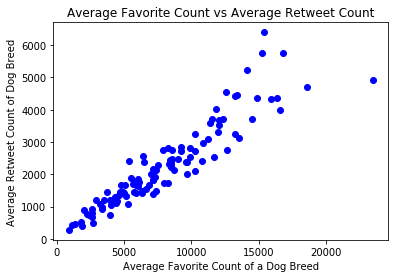

In [43]:
import matplotlib.pyplot as plt

plt.plot(dog_type['favorite_count'],dog_type['retweet_count'],'bo')
plt.xlabel('Average Favorite Count of a Dog Breed')
plt.ylabel('Average Retweet Count of Dog Breed')
plt.title('Average Favorite Count vs Average Retweet Count')

#### The above plot shows that there is a positive correlation between average favorite count and retweet count.

## References

#### https://stackoverflow.com/questions/46381548/python-how-can-i-identify-a-decimal-number-in-a-string
#### https://stackoverflow.com/questions/20375551/what-is-the-difference-between-d-and-d-or-w-and-w-in-regular-expression